#### Membuat Model Klasifikasi (KNN)

In [21]:
# Import package yang dibutuhkan

import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Membaca data fitur

df = pd.read_csv('feature_train.csv')
df.head()

,Unnamed: 0,mature,immature,rotten,label
0,0,0.951803,0.000002,0.048197,mature
1,1,0.919623,0.000000,0.080377,mature
2,2,0.938026,0.000000,0.061974,mature
3,3,0.968501,0.000000,0.031499,mature
4,4,0.952641,0.000000,0.047359,mature


In [8]:
# Me-replace nilai label menjadi angka

# mature = 0
df['label'] = df['label'].replace(['mature'], 0)

# immature = 1
df['label'] = df['label'].replace(['immature'], 1)

# rotten = 2
df['label'] = df['label'].replace(['rotten'], 2)

df

,Unnamed: 0,mature,immature,rotten,label
0,0,0.951803,0.000002,0.048197,0
1,1,0.919623,0.000000,0.080377,0
2,2,0.938026,0.000000,0.061974,0
3,3,0.968501,0.000000,0.031499,0
4,4,0.952641,0.000000,0.047359,0
5,5,0.904430,0.000000,0.095570,0
6,6,0.908847,0.027786,0.091153,0
7,7,0.964724,0.000000,0.035276,0
8,8,0.000000,0.883937,0.116063,1
9,9,0.000000,0.629699,0.370301,1


In [9]:
# Membuat model klasifikasi

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df[['mature', 'immature', 'rotten']], df['label'])

KNeighborsClassifier()

In [10]:
# Mencoba memprediksi menggunakan model yang telah dibuat

df_test = pd.read_csv('feature_test.csv')

df_test['label'] = df_test['label'].replace(['mature'], 0)
df_test['label'] = df_test['label'].replace(['immature'], 1)
df_test['label'] = df_test['label'].replace(['rotten'], 2)

predict = knn.predict(df_test[['mature', 'immature', 'rotten']])

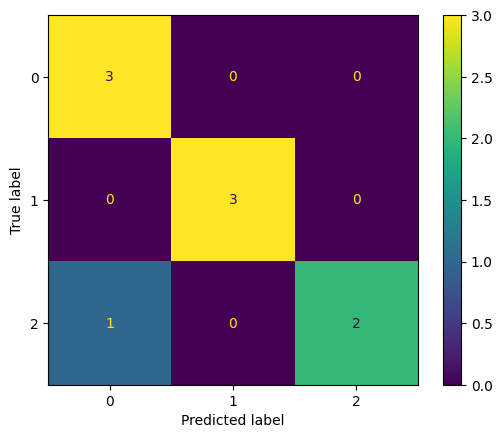

In [22]:
# Menampilkan confusion matrix

cm = confusion_matrix(df_test['label'], predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

In [23]:
# Skor model (akurasi, f1, recall, precision)

print(f"Akurasi dari model: {accuracy_score(predict, df_test['label'])}")
print(f"F1 Score dari model: {f1_score(predict, df_test['label'], average='micro')}")
print(f"Precision dari model: {precision_score(predict, df_test['label'], average='micro')}")
print(f"Recall dari model: {recall_score(predict, df_test['label'], average='micro')}")

Akurasi dari model: 0.8888888888888888
F1 Score dari model: 0.8888888888888888
Precision dari model: 0.8888888888888888
Recall dari model: 0.8888888888888888


In [24]:
# Export model klasifikasi yang telah dibuat

pickle.dump(knn, open('cls.sav', 'wb'))